<a href="https://colab.research.google.com/github/hazra-kerubo/Dijkstra-algorithm/blob/main/Dijkstra's_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dijkstra's algorithm using a graph, a function to find the shortest path, and a test case to validate it.**

In [ ]:
import heapq

def dijkstra_shortest_path(graph, start, end):
    pq = []
    heapq.heappush(pq, (0, start, [start]))  # (distance, current_node, path)
    visited = set()

    while pq:
        (dist, current_node, path) = heapq.heappop(pq)

        if current_node == end:
            return dist, path

        if current_node in visited:
            continue

        visited.add(current_node)

        for neighbor, weight in graph.get(current_node, []):
            if neighbor not in visited:
                heapq.heappush(pq, (dist + weight, neighbor, path + [neighbor]))

    return float("inf"), []  # No path found


In [ ]:

    visited.add(current_node)

Testcase

In [ ]:
def test_dijkstra():
    # Define a simple graph
    graph = {
        'A': [('B', 1), ('C', 4)],
        'B': [('A', 1), ('C', 2), ('D', 5)],
        'C': [('A', 4), ('B', 2), ('D', 1)],
        'D': [('B', 5), ('C', 1), ('E', 3)],
        'E': [('D', 3)]
    }

    start = 'A'
    end = 'E'
    distance, path = dijkstra_shortest_path(graph, start, end)

    print(f"Shortest path from {start} to {end}: {path} with distance {distance}")

# Run test
test_dijkstra()


Shortest path from A to E: ['A', 'B', 'C', 'D', 'E'] with distance 7


Testcase 2 - Complex graph with multiple equal paths

In [ ]:
def test_equal_paths():
    graph = {
        'A': [('B', 2), ('C', 2)],
        'B': [('A', 2), ('D', 2)],
        'C': [('A', 2), ('D', 2)],
        'D': [('B', 2), ('C', 2), ('E', 1)],
        'E': [('D', 1)]
    }

    start = 'A'
    end = 'E'
    distance, path = dijkstra_shortest_path(graph, start, end)

    print(f"[TEST] Shortest path from {start} to {end}: {path} with distance {distance}")
    expected_distance = 5
    assert distance == expected_distance, f"Expected distance {expected_distance}, got {distance}"
    assert path[0] == 'A' and path[-1] == 'E', "Path should start at A and end at E"
    print("[PASS] test_equal_paths")

# Run this test
test_equal_paths()


[TEST] Shortest path from A to E: ['A', 'B', 'D', 'E'] with distance 5
[PASS] test_equal_paths


Testcase 3 - No path available

In [ ]:
def test_no_path_exists():
    graph = {
        'A': [('B', 1)],
        'B': [('A', 1)],
        'C': [('D', 1)],
        'D': [('C', 1)]
    }

    start = 'A'
    end = 'D'
    distance, path = dijkstra_shortest_path(graph, start, end)

    print(f"[TEST] Trying to find path from {start} to {end}")
    assert distance == float("inf"), f"Expected distance to be infinity, got {distance}"
    assert path == [], f"Expected no path, got {path}"
    print("[PASS] test_no_path_exists")

# Run this test
test_no_path_exists()


[TEST] Trying to find path from A to D
[PASS] test_no_path_exists


Testcase 4 Graph with a cycle

In [ ]:
def test_cycle_in_graph():
    graph = {
        'A': [('B', 1), ('C', 5)],
        'B': [('A', 1), ('C', 1)],
        'C': [('A', 5), ('B', 1), ('D', 1)],
        'D': [('C', 1)]
    }

    start = 'A'
    end = 'D'
    distance, path = dijkstra_shortest_path(graph, start, end)

    print(f"[TEST] Shortest path from {start} to {end}: {path} with distance {distance}")
    expected_path = ['A', 'B', 'C', 'D']
    expected_distance = 3
    assert distance == expected_distance, f"Expected distance {expected_distance}, got {distance}"
    assert path == expected_path, f"Expected path {expected_path}, got {path}"
    print("[PASS] test_cycle_in_graph")

# Run this test
test_cycle_in_graph()


[TEST] Shortest path from A to D: ['A', 'B', 'C', 'D'] with distance 3
[PASS] test_cycle_in_graph


In [ ]:
!pip install networkx matplotlib


Shortest path from A to E: ['A', 'B', 'C', 'D', 'E'] with distance 7


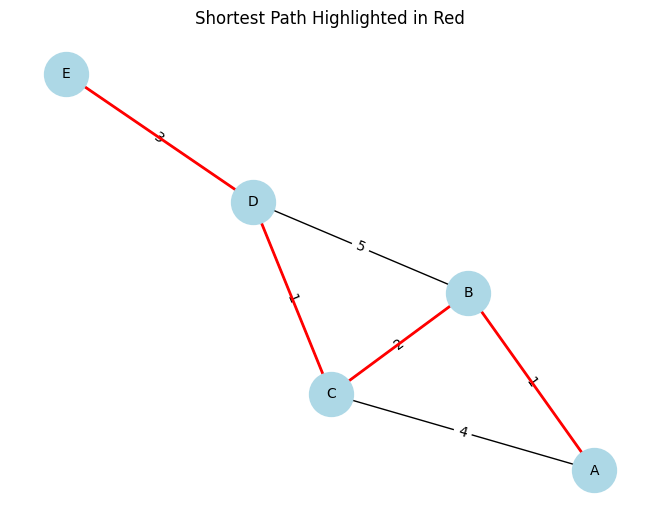

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_shortest_path(graph, start, end):
    pq = []
    heapq.heappush(pq, (0, start, [start]))
    visited = set()

    while pq:
        dist, current_node, path = heapq.heappop(pq)

        if current_node == end:
            return dist, path

        if current_node in visited:
            continue

        visited.add(current_node)

        for neighbor, weight in graph.get(current_node, []):
            if neighbor not in visited:
                heapq.heappush(pq, (dist + weight, neighbor, path + [neighbor]))

    return float("inf"), []

def visualize_graph(graph_data, path):
    G = nx.Graph()

    # Add edges with weights
    for node, neighbors in graph_data.items():
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G, seed=42)

    edge_labels = nx.get_edge_attributes(G, 'weight')

    # Draw nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10)

    # Draw all edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Highlight the shortest path
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("Shortest Path Highlighted in Red")
    plt.show()

def test_dijkstra_with_visual():
    graph = {
        'A': [('B', 1), ('C', 4)],
        'B': [('A', 1), ('C', 2), ('D', 5)],
        'C': [('A', 4), ('B', 2), ('D', 1)],
        'D': [('B', 5), ('C', 1), ('E', 3)],
        'E': [('D', 3)]
    }

    start = 'A'
    end = 'E'
    distance, path = dijkstra_shortest_path(graph, start, end)
    print(f"Shortest path from {start} to {end}: {path} with distance {distance}")
    visualize_graph(graph, path)

# Run the test
test_dijkstra_with_visual()


**Real Time Shortest Simulation (Edge Update Example)**

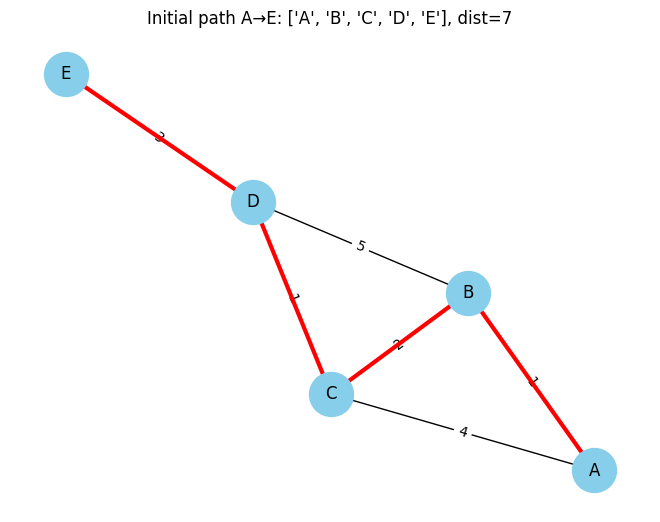

Updating edge weight: C-D from 1 → 10


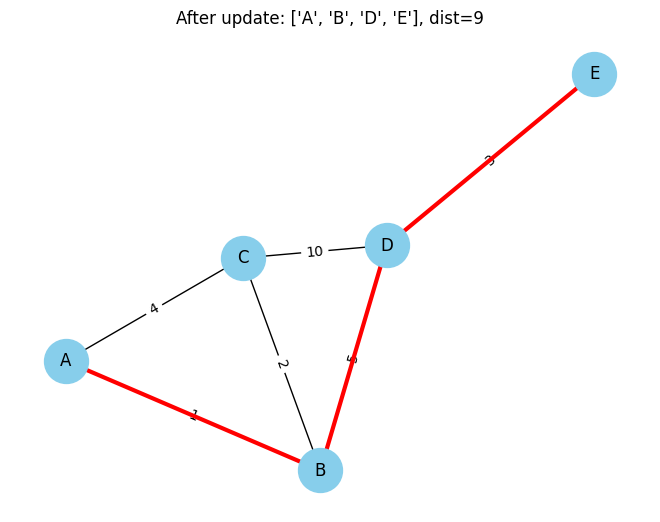

Adding shortcut A→E with weight 2


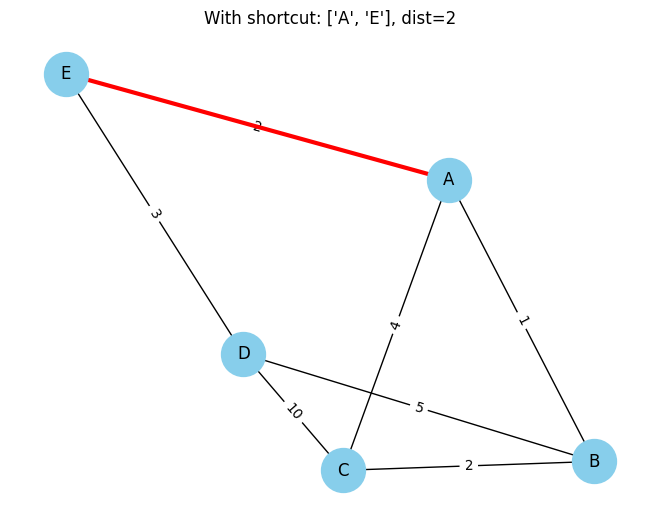

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import time

def dijkstra_shortest_path(graph, start, end):
    pq = []
    heapq.heappush(pq, (0, start, [start]))
    visited = set()

    while pq:
        dist, current_node, path = heapq.heappop(pq)

        if current_node == end:
            return dist, path

        if current_node in visited:
            continue
        visited.add(current_node)

        for neighbor, weight in graph.get(current_node, []):
            if neighbor not in visited:
                heapq.heappush(pq, (dist + weight, neighbor, path + [neighbor]))

    return float("inf"), []

def visualize_graph(graph_data, path, title="Graph"):
    G = nx.Graph()

    for node, neighbors in graph_data.items():
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G, seed=42)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.clf()
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title(title)
    plt.pause(1)

def run_real_time_simulation():
    graph = {
        'A': [('B', 1), ('C', 4)],
        'B': [('A', 1), ('C', 2), ('D', 5)],
        'C': [('A', 4), ('B', 2), ('D', 1)],
        'D': [('B', 5), ('C', 1), ('E', 3)],
        'E': [('D', 3)]
    }

    start = 'A'
    end = 'E'

    plt.ion()  # Turn on interactive mode

    # Step 1: Initial graph
    distance, path = dijkstra_shortest_path(graph, start, end)
    visualize_graph(graph, path, title=f"Initial path A→E: {path}, dist={distance}")

    # Step 2: Simulate edge weight change
    time.sleep(2)
    print("Updating edge weight: C-D from 1 → 10")
    graph['C'] = [('A', 4), ('B', 2), ('D', 10)]
    graph['D'] = [('B', 5), ('C', 10), ('E', 3)]
    distance, path = dijkstra_shortest_path(graph, start, end)
    visualize_graph(graph, path, title=f"After update: {path}, dist={distance}")

    # Step 3: Simulate new shortcut
    time.sleep(2)
    print("Adding shortcut A→E with weight 2")
    graph['A'].append(('E', 2))
    graph['E'].append(('A', 2))
    distance, path = dijkstra_shortest_path(graph, start, end)
    visualize_graph(graph, path, title=f"With shortcut: {path}, dist={distance}")

    plt.ioff()
    plt.show()

# Run it
run_real_time_simulation()


**Conclusion**
* Dijkstra’s Algorithm is Reliable for Weighted Graphs with Non-Negative Edges
*It consistently finds the shortest path when edge weights are positive, as demonstrated in all test cases.

* Handles Various Graph Structures Effectively

 Multiple equal-cost paths: It returns a valid shortest path.

 Disconnected nodes: It correctly returns no path (∞ distance and empty path).

 Cycles: It avoids infinite loops and selects the optimal path.

 Dynamic Updates: It can handle graph changes in real-time, with path recalculations.

* Efficient with Small to Medium Graphs
 The heap-based priority queue (heapq) keeps the algorithm fast and efficient for most typical use cases.


**Recommendations**
* Use Dijkstra for Non-Negative Weights Only
For graphs with negative weights, switch to Bellman-Ford.

* Optimize for Large-Scale Graphs
For larger or dense graphs, consider:Using A* Search with heuristics

* Implementing with adjacency lists and priority queue libraries like heapdict for performance

* Extend to Directed Graphs if Needed
Right now, the graph is treated as undirected. If direction matters (eg one-way streets or flows), update the data structure accordingly.
